# Selection Analysis

This Jupyter Notebook will be used to quickly and somewhat superficially investigate whether I have properly set the selection pressure parameter. In the configuration files, there is a parameter called **SELECTION_PRESSURE** whose default value is 0.998. 

Previously I had not included this parameter in the parameter files, so presumably the default value (0.998) was used, but I wanted to test this, too. 

To test the outcomes, I performed three runs of 500,000 generations of the same seed, *seed05*, of the *population_down* condition (since it is the fastest to run): once without **SELECTION_PRESSURE** in the parameter file, once with it explicitly set to the supposed default of 0.998, and once explicitly set to the value of 0.5 (approximately half of the default value). 

We will graph the genome size, fitness, and number of coding bases.

## Reading in the data for genome size

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Laptop
#DEFAULT_SELECTION_DIRECTORY = "C:\\ThesisData\\Selection_Experiments\\Default\\pop_down\\"
#DECREASED_SELECTION_DIRECTORY = "C:\\ThesisData\\Selection_Experiments\\Decreased\\pop_down\\"
#EXP_DEFAULT_SELECTION_DIRECTORY = "C:\\ThesisData\\Selection_Experiments\\Exp_Default\\pop_down\\"

# Desktop
DEFAULT_SELECTION_DIRECTORY = "C:\\Users\\Brian Davis\\Dropbox\\Freiburg Masters Semesters\\Thesis\\Results\\seed05\\Selection_Experiments\\Default\\pop_down\\"
DECREASED_SELECTION_DIRECTORY = "C:\\Users\\Brian Davis\\Dropbox\\Freiburg Masters Semesters\\Thesis\\Results\\seed05\\Selection_Experiments\\Decreased\\pop_down\\"
EXP_DEFAULT_SELECTION_DIRECTORY = "C:\\Users\\Brian Davis\\Dropbox\\Freiburg Masters Semesters\\Thesis\\Results\\seed05\\Selection_Experiments\\Exp_Default\\pop_down\\"

WINDOW_SIZE = 10000 # For smoothing the graphs

# Create Pandas DataFrames to hold the data from the 'stats' directory

# Column names
bp_best_names = ['generation', 'num_bp_not_in_any_CDS', 'num_bp_not_in_any_functional_CDS', 'num_bp_not_in_any_non-functional_CDS', 'num_bp_not_included_in_any_RNA', 'num_bp_not_included_in_any_coding_RNA', 'num_bp_not_included_in_any_non-coding_RNA', 'num_of_non-essential_bp', 'num_of_non-essential_bp_including_non-functional_genes']
fitness_best_names = ['generation', 'pop_size', 'fitness', 'genome_size', 'metabolic_error','parents_metabolic_error', 'metabolic_fitness', 'secretion_error', 'parents_secretion_error', 'secretion_fitness', 'amt_compound_present']

print("Reading in data...")

# Read in the data from stat_bp_best.out
df_stat_bp_best_default = pd.read_csv(DEFAULT_SELECTION_DIRECTORY + "stats\\stat_bp_best.out", skiprows=17, delim_whitespace=True, header=0, names=bp_best_names)
df_stat_bp_best_decreased = pd.read_csv(DECREASED_SELECTION_DIRECTORY + "stats\\stat_bp_best.out", skiprows=17, delim_whitespace=True, header=0, names=bp_best_names)
df_stat_bp_best_exp_default = pd.read_csv(EXP_DEFAULT_SELECTION_DIRECTORY + "stats\\stat_bp_best.out", skiprows=17, delim_whitespace=True, header=0, names=bp_best_names)

# Read in the data from stat_fitness_best.out
df_stat_fitness_best_default = pd.read_csv(DEFAULT_SELECTION_DIRECTORY + "stats\\stat_fitness_best.out", skiprows=17,delim_whitespace=True, header=0, names=fitness_best_names)
df_stat_fitness_best_decreased = pd.read_csv(DECREASED_SELECTION_DIRECTORY + "stats\\stat_fitness_best.out", skiprows=17,delim_whitespace=True, header=0, names=fitness_best_names)
df_stat_fitness_best_exp_default = pd.read_csv(EXP_DEFAULT_SELECTION_DIRECTORY + "stats\\stat_fitness_best.out", skiprows=17, delim_whitespace=True, header=0, names=fitness_best_names)

# Column names
genes_best_names = ['generation', 'num_coding_RNAs', 'num_non-coding_RNAs', 'avg_size_of_coding_RNAs', 'avg_size_of_non-coding_RNAs', 'num_functional_genes', 'num_non-functional_genes', 'avg_size_of_functional_genes', 'avg_size_of_non-functional_genes']

# Read in the data from stat_genes_best.out
df_stat_genes_best_default = pd.read_csv(DEFAULT_SELECTION_DIRECTORY + "stats//stat_genes_best.out", skiprows=14, delim_whitespace=True,header=0, names=genes_best_names)
df_stat_genes_best_decreased = pd.read_csv(DECREASED_SELECTION_DIRECTORY + "stats//stat_genes_best.out", skiprows=14, delim_whitespace=True,header=0, names=genes_best_names)
df_stat_genes_best_exp_default = pd.read_csv(EXP_DEFAULT_SELECTION_DIRECTORY + "stats\\stat_genes_best.out", skiprows=14, delim_whitespace=True, header=0, names=genes_best_names)
print("done.")


Reading in data...
done.


## Genome Size

### Plot the results

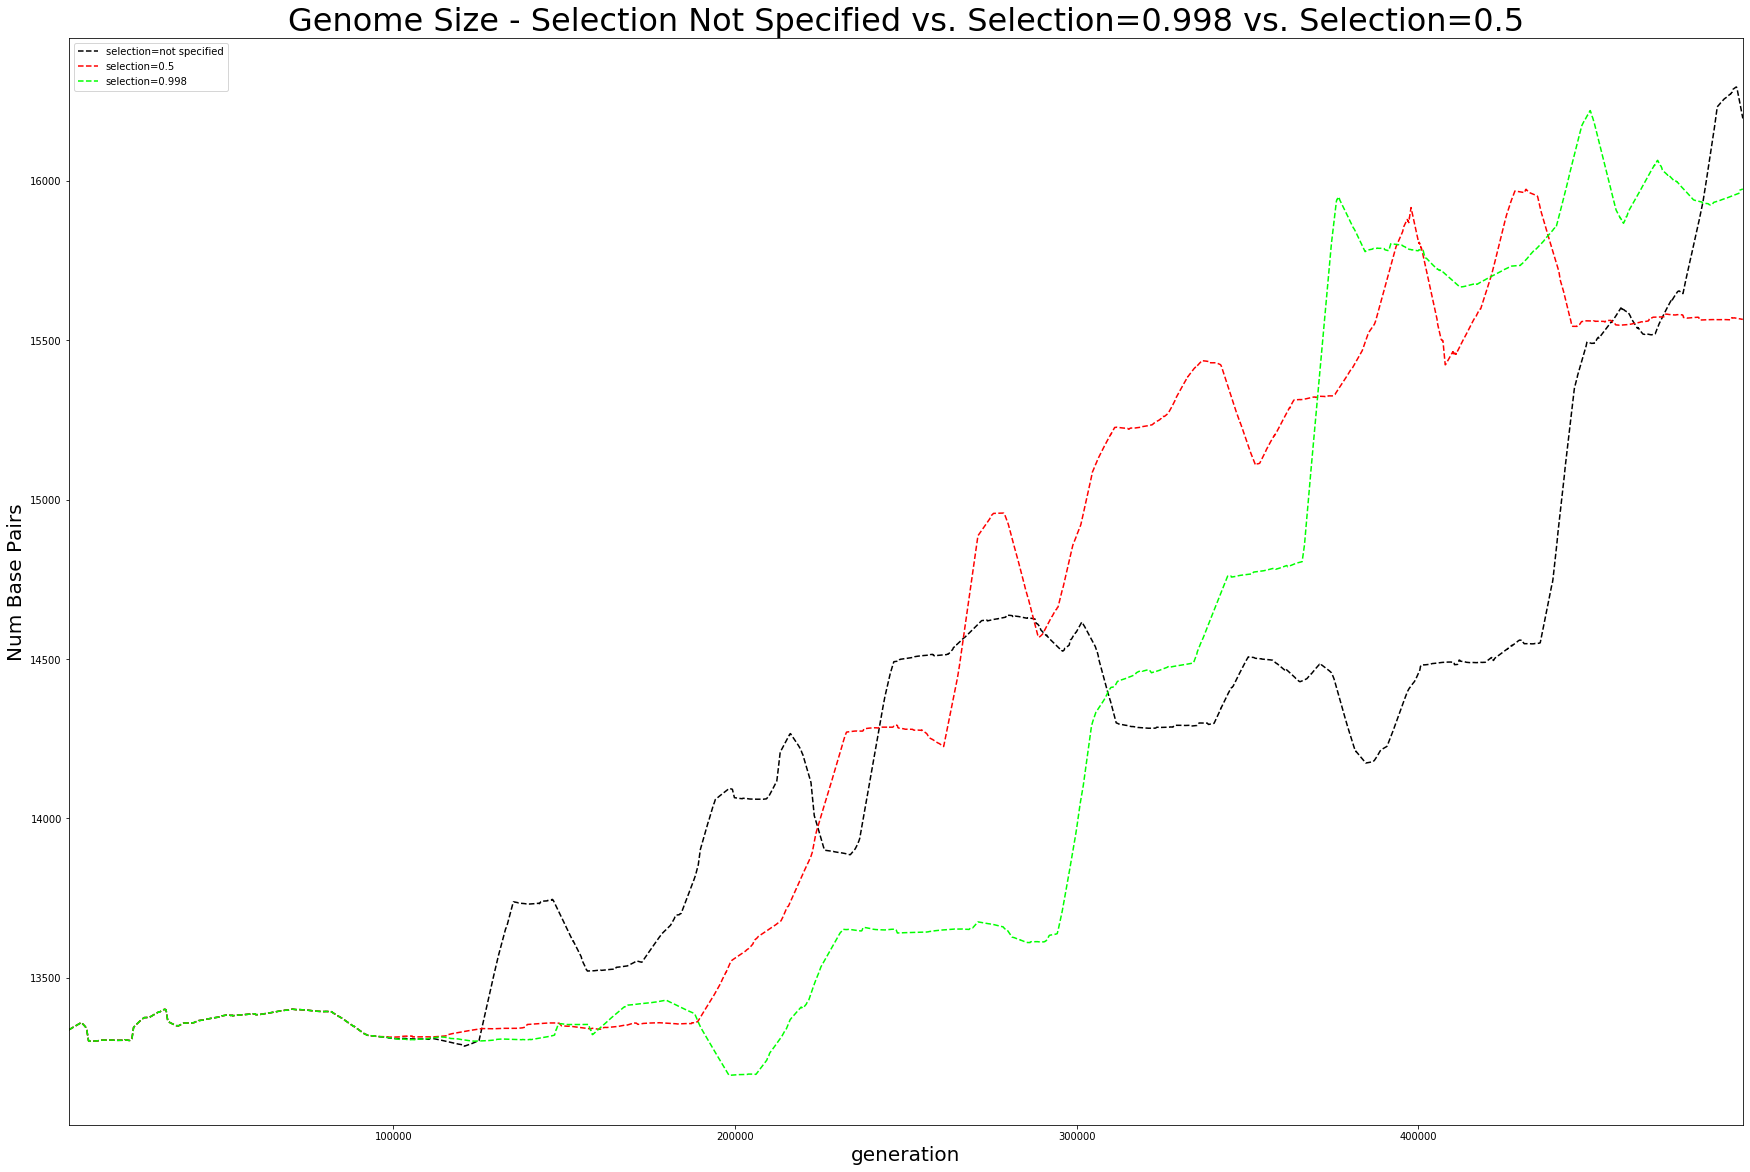

In [2]:
# Create new figure
fig_genome_size_best = plt.figure(figsize=(30,20))
ax_genome_size_best = fig_genome_size_best.add_subplot(111)
ax_genome_size_best.set_title("Genome Size - Selection Not Specified vs. Selection=0.998 vs. Selection=0.5", fontsize=32)
ax_genome_size_best.set_xlabel("Generation", fontsize=20)
ax_genome_size_best.set_ylabel("Num Base Pairs", fontsize=20)

# Plot the results to the figure. For each plot, smooth plot by using rolling window
# of average of $WINDOW_SIZE points, rather than all data points

# Implicit Default
df_tmp1 = df_stat_fitness_best_default[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp1.plot(x='generation', y='genome_size', linestyle='dashed', color=(0.0,0.0,0.0), label='selection=not specified', ax=ax_genome_size_best)

# Decreased
df_tmp2 = df_stat_fitness_best_decreased[['generation','genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp2.plot(x='generation', y='genome_size',linestyle='dashed', color=(1.0,0.0,0.0), label='selection=0.5', ax=ax_genome_size_best)

# Explicit Default
df_tmp3 = df_stat_fitness_best_exp_default[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp3.plot(x='generation', y='genome_size', linestyle='dashed', color=(0.0,1.0,0.0), label='selection=0.998', ax=ax_genome_size_best)



## Fitness

### Plot the results

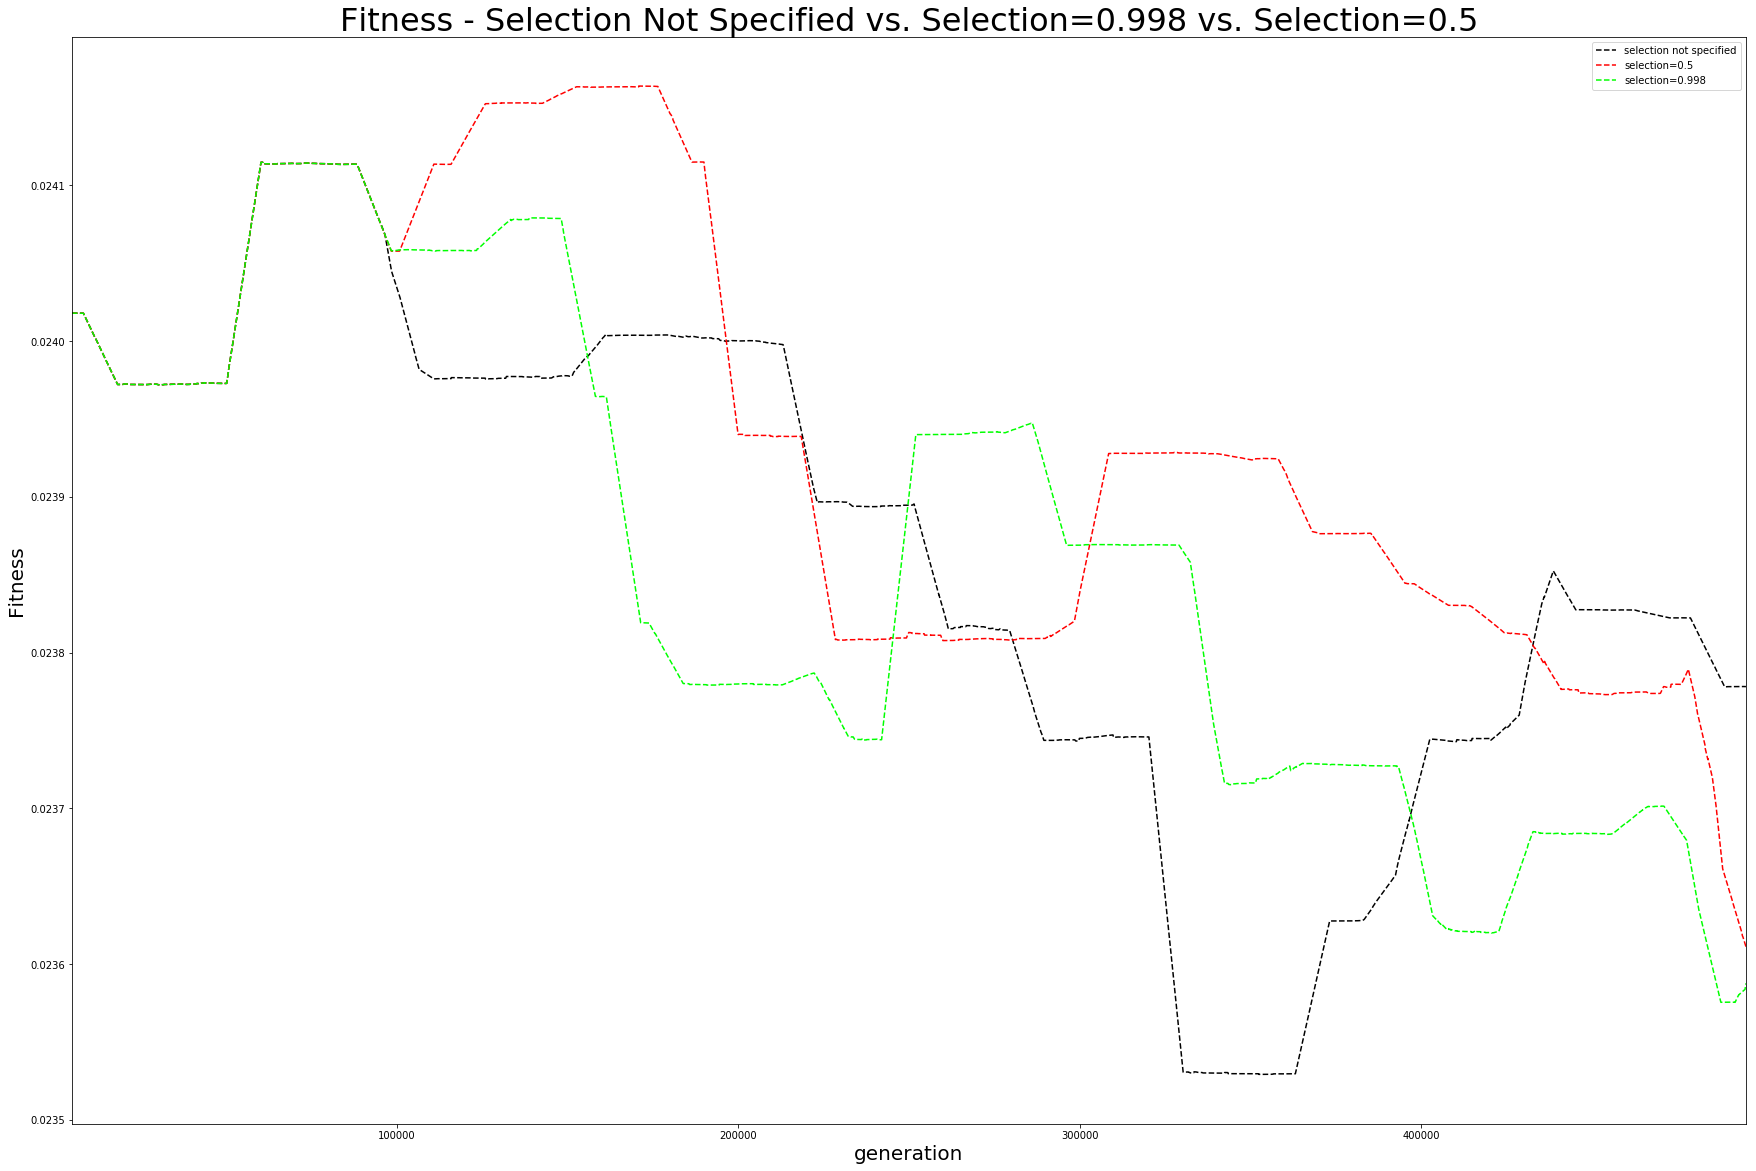

In [4]:
# Create a new figure
fig_fitness_best = plt.figure(figsize=(30,20))
ax_fitness_best = fig_fitness_best.add_subplot(111)
ax_fitness_best.set_title("Fitness - Selection Not Specified vs. Selection=0.998 vs. Selection=0.5", fontsize=32)
ax_fitness_best.set_xlabel("Generation", fontsize=20)
ax_fitness_best.set_ylabel("Fitness", fontsize=20)

df_tmp1 = df_stat_fitness_best_default[['generation','fitness']].copy()
df_tmp1 = df_tmp1.rolling(WINDOW_SIZE).mean()

df_tmp2 = df_stat_fitness_best_decreased[['generation','fitness']].copy()
df_tmp2 = df_tmp2.rolling(WINDOW_SIZE).mean()

df_tmp3 = df_stat_fitness_best_exp_default[['generation', 'fitness']].copy()
df_tmp3 = df_tmp3.rolling(WINDOW_SIZE).mean()

df_tmp1.plot(x='generation', y='fitness', linestyle='dashed', color=(0.0,0.0,0.0), label='selection not specified', ax=ax_fitness_best)
df_tmp2.plot(x='generation', y='fitness', linestyle='dashed', color=(1.0,0.0,0.0), label='selection=0.5', ax=ax_fitness_best)
df_tmp3.plot(x='generation', y='fitness', linestyle='dashed', color=(0.0,1.0,0.0), label='selection=0.998', ax=ax_fitness_best)

## Number of Coding Bases

### Plot the results

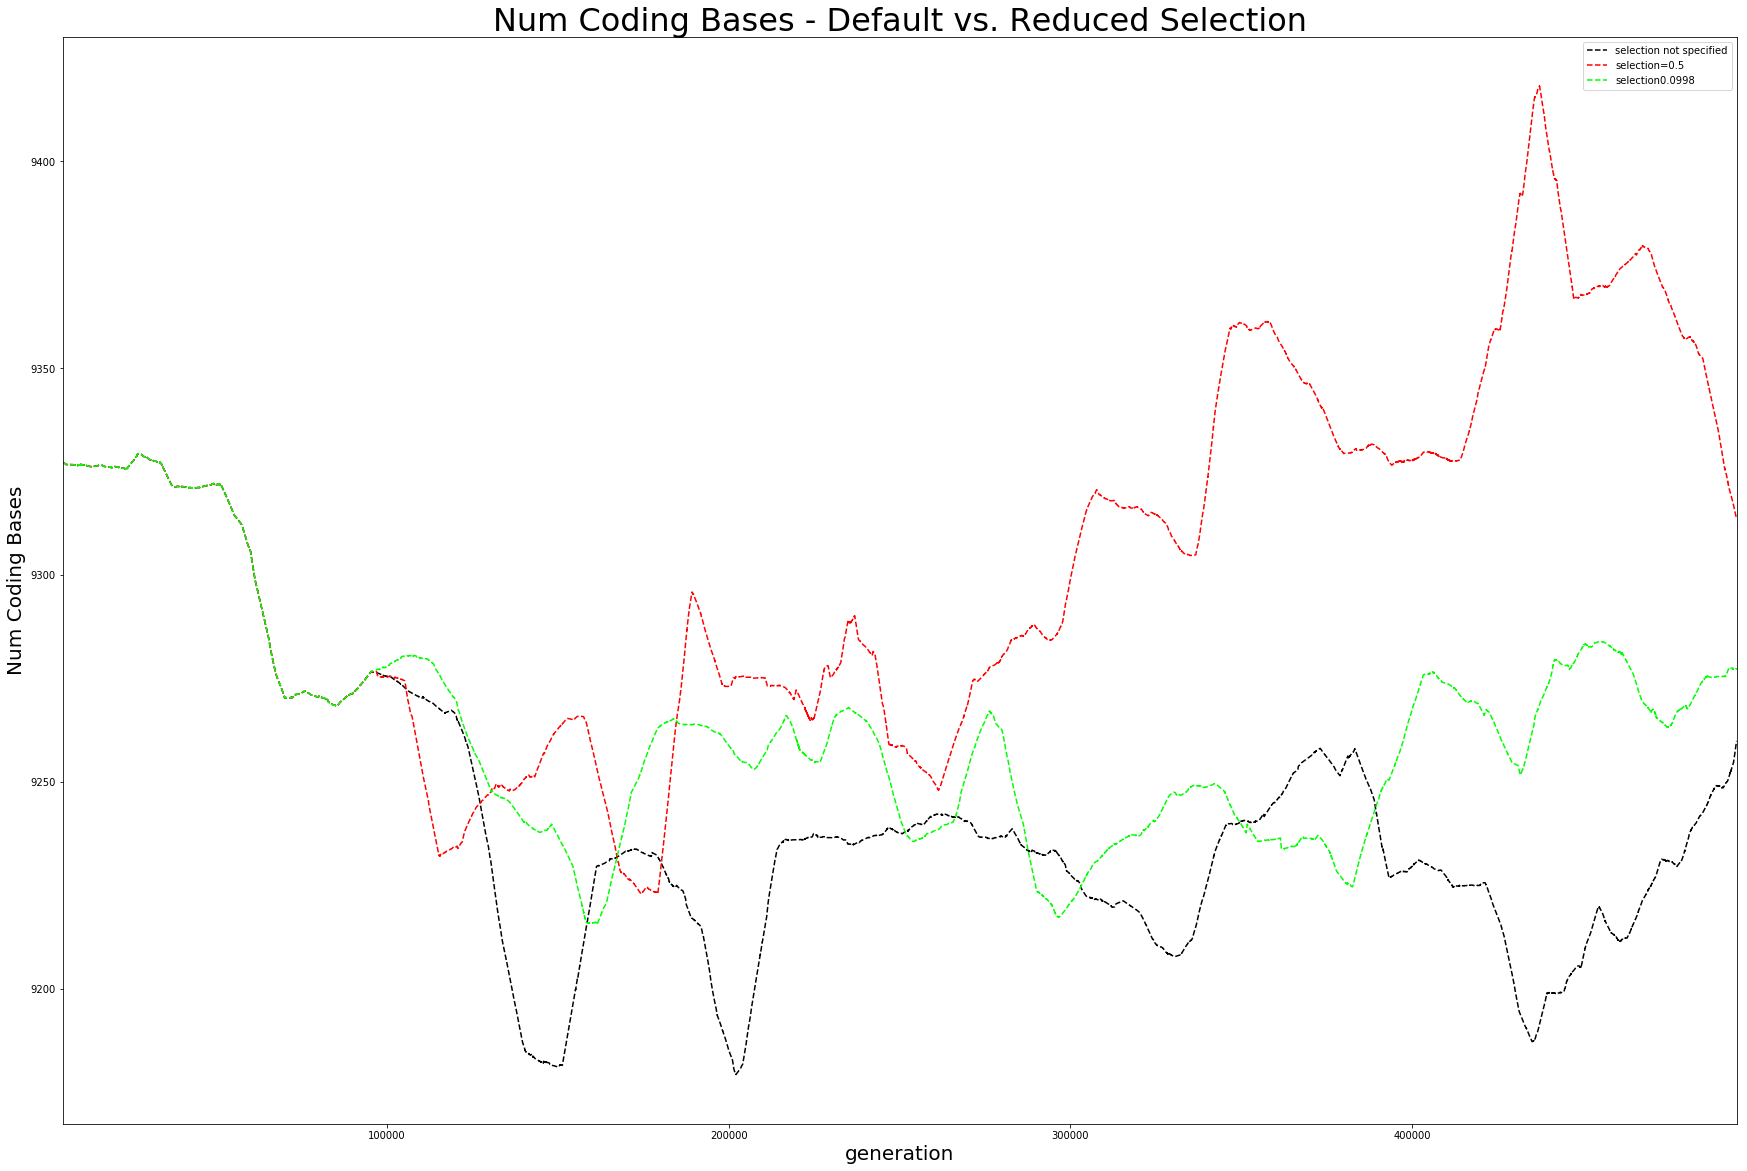

In [5]:
# Create new figure
fig_num_coding_bases_best = plt.figure(figsize=(30,20))
ax_num_coding_bases_best = fig_num_coding_bases_best.add_subplot(111)
ax_num_coding_bases_best.set_title("Num Coding Bases - Default vs. Reduced Selection", fontsize=32)
ax_num_coding_bases_best.set_xlabel("Generation", fontsize=20)
ax_num_coding_bases_best.set_ylabel("Num Coding Bases", fontsize=20)

df_tmp1 = df_stat_fitness_best_default[['generation']].copy()
df_tmp1['num_coding_bases'] = df_stat_fitness_best_default['genome_size'] - df_stat_bp_best_default['num_of_non-essential_bp']
df_tmp1 = df_tmp1[['generation', 'num_coding_bases']].copy().rolling(WINDOW_SIZE).mean()

df_tmp2 = df_stat_fitness_best_decreased[['generation']].copy()
df_tmp2['num_coding_bases'] = df_stat_fitness_best_decreased['genome_size'] - df_stat_bp_best_decreased['num_of_non-essential_bp']
df_tmp2 = df_tmp2[['generation', 'num_coding_bases']].copy().rolling(WINDOW_SIZE).mean()

df_tmp3 = df_stat_fitness_best_exp_default[['generation']].copy()
df_tmp3['num_coding_bases'] = df_stat_fitness_best_exp_default['genome_size'] - df_stat_bp_best_exp_default['num_of_non-essential_bp']
df_tmp3 = df_tmp3[['generation', 'num_coding_bases']].copy().rolling(WINDOW_SIZE).mean()

df_tmp1.plot(x='generation', y='num_coding_bases', linestyle='dashed', color=(0.0,0.0,0.0), label='selection not specified', ax=ax_num_coding_bases_best)
df_tmp2.plot(x='generation', y='num_coding_bases', linestyle='dashed', color=(1.0, 0.0, 0.0), label='selection=0.5', ax=ax_num_coding_bases_best)
df_tmp3.plot(x='generation', y='num_coding_bases', linestyle='dashed', color=(0.0, 1.0, 0.0), label='selection0.0998', ax=ax_num_coding_bases_best)